In [1]:
#! /usr/bin/python3
# author : Priyanshu Shrivastav (from IIT Palakkad, India)

import numpy as np, matplotlib.pyplot as plt
import csv, sys
from sklearn.preprocessing import MinMaxScaler

file_name = input("file index : ")
DATA_SIZE = 10000
PARAMETER_COUNT = 2
TRAIN_DATA_SET  = "Train" + file_name + ".csv"
TEST_DATA_SET   = "Test" + file_name + ".csv"
ALPHA           = 0.001

train_sz, test_sz, loss = 0, 0, []
X = np.ndarray((DATA_SIZE, PARAMETER_COUNT + 1)) # +1 for bias
Y = np.zeros(DATA_SIZE, dtype=int)
W = np.ndarray(PARAMETER_COUNT + 1)
min_max_scaler = MinMaxScaler()

class Perceptron:
    # Take training input data
    def take_training_input(self):
        global train_sz
        train_sz = 0
        with open(TRAIN_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[train_sz][p] = float(row[p])
                X[train_sz][PARAMETER_COUNT] = 1.0
                Y[train_sz] = float(row[PARAMETER_COUNT])
                if Y[train_sz] == 0:
                    Y[train_sz] = -1
                train_sz += 1

# plot training data data
    def show_data(self, title, xlab="", ylab=""):
        print('=== Data points given to train : {sz} ==='.format(sz=train_sz))
        plt.title(title)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        for train_data_index in range(train_sz):
            if (Y[train_data_index] == 1):
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'bo')
            else:
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'ro')

# find weights
    def find_weights(self):
        global train_sz, W, loss
        print("================================       TRAINING       ==================================")
        print("Training data size : {tz}".format(tz=train_sz))
        W = np.random.random(PARAMETER_COUNT + 1)
        ok = False
        epoch = 0
        while ok is False:
            if epoch > 500: # linear classification not possible
                break
            W_old, x_add, y_real = np.copy(W), [], 0
            epoch += 1
            ok = True
            err_cnt = 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and Y[tc] < 0):
                    x_add = np.copy(-1*X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                elif (y_hat < 0 and Y[tc] > 0):
                    x_add = np.copy(X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                loss.append(err_cnt)

            err_pos, err_neg, tp, tn = 0, 0, 0, 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and y_real < 0):
                    err_neg += 1
                elif (y_hat < 0 and y_real > 0):
                    err_pos += 1
                elif (y_real > 0):
                    tp += 1
                elif (y_real < 0):
                    tn += 1

            print("----------------------------------------------------------------------------------------")
            print("[ Epoch : {epoch} ], [ error count : {err} ]".format(epoch=epoch, err=err_cnt))
            print("W_old : {w_old}".format(w_old=W_old))
            print("W_new : {w_new}".format(w_new=W))
            print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
            print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))

    def draw_line_2d(self):
        global train_sz, W
        mx_x1, mx_x2 = -1e9, -1e9
        mn_x1, mn_x2 = 1e9, 1e9
        for tc in range(train_sz):
            mx_x1 = max(mx_x1, X[tc][0])
            mn_x1 = min(mn_x1, X[tc][0])
        X1 = np.linspace(mn_x1, mx_x1, 1000)
        # 0 = w[0]*x[0] + w[1]*x[1] + w[2]*x[3]
        X2 = []
        for x in X1:
            X2.append(-1*(W[0]*x + W[2]*1.0)/W[1])
        plt.plot(X1, X2)


    def take_test_input(self):
        global test_sz, X, Y
        test_sz = 0
        with open(TEST_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[test_sz][p] = float(row[p])
                X[test_sz][PARAMETER_COUNT] = 1.0
                Y[test_sz] = float(row[PARAMETER_COUNT])
                if Y[test_sz] == 0:
                    Y[test_sz] = -1
                test_sz += 1

    def test(self):
        global test_sz, X, Y, loss, W
        print("================================       TESTING        ==================================")
        print("Test Data size : ", test_sz)
        loss, err_pos, err_neg, tp, tn = [], 0, 0, 0, 0
        for tc in range(test_sz):
            y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
            if (y_hat > 0 and y_real < 0):
                err_neg += 1
            elif (y_hat < 0 and y_real > 0):
                err_pos += 1
            elif (y_real > 0):
                tp += 1
            elif (y_real < 0):
                tn += 1
        print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
        print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))
        print("============================         TESTING FINISHED          =========================")

    def draw_error_count(self):
        global loss, train_sz
        ep = [epoch + 1 for epoch in range(len(loss))]
        accuracy = [train_sz - x for x in loss]
        plt.title("Classification Error v/s iterations")
        plt.ylabel("Classification Error")
        plt.xlabel("Iterations")
        plt.plot(ep, loss, 'r')
        plt.show()

        plt.title("Classification Accuracy v/s iterations")
        plt.ylabel("Classification Accuracy")
        plt.xlabel("Iterations")
        plt.plot(ep, accuracy, 'b')
        plt.show()


file index : 4


In [2]:
t = Perceptron()
t.take_training_input()

In [3]:
t.find_weights()

================================       TRAINING       ==================================
Training data size : 960
----------------------------------------------------------------------------------------
[ Epoch : 1 ], [ error count : 573 ]
W_old : [0.63596045 0.42908642 0.25607121]
W_new : [-0.01859704  0.01153616 -0.01092879]
True positive : 392, False positive : 93
True negative : 392, False negative : 83
----------------------------------------------------------------------------------------
[ Epoch : 2 ], [ error count : 188 ]
W_old : [-0.01859704  0.01153616 -0.01092879]
W_new : [-0.0026285   0.00029837  0.00107121]
True positive : 444, False positive : 163
True negative : 322, False negative : 31
----------------------------------------------------------------------------------------
[ Epoch : 3 ], [ error count : 207 ]
W_old : [-0.0026285   0.00029837  0.00107121]
W_new : [-9.81650418e-04  1.33444193e-03  7.12119029e-05]
True positive : 443, False positive : 302
True negative : 

----------------------------------------------------------------------------------------
[ Epoch : 49 ], [ error count : 210 ]
W_old : [-0.00220484  0.00083313  0.00107121]
W_new : [-0.00127108  0.00062092  0.00107121]
True positive : 468, False positive : 306
True negative : 179, False negative : 7
----------------------------------------------------------------------------------------
[ Epoch : 50 ], [ error count : 216 ]
W_old : [-0.00127108  0.00062092  0.00107121]
W_new : [-0.00151706 -0.00013751  0.00107121]
True positive : 447, False positive : 177
True negative : 308, False negative : 28
----------------------------------------------------------------------------------------
[ Epoch : 51 ], [ error count : 208 ]
W_old : [-0.00151706 -0.00013751  0.00107121]
W_new : [-0.00077101  0.00013854  0.00107121]
True positive : 471, False positive : 352
True negative : 133, False negative : 4
----------------------------------------------------------------------------------------
[ Epoch

----------------------------------------------------------------------------------------
[ Epoch : 92 ], [ error count : 204 ]
W_old : [-1.24423697e-03  1.23900545e-04  7.12119029e-05]
W_new : [-1.25193168e-03  1.29813009e-04  7.12119029e-05]
True positive : 416, False positive : 97
True negative : 388, False negative : 59
----------------------------------------------------------------------------------------
[ Epoch : 93 ], [ error count : 213 ]
W_old : [-1.25193168e-03  1.29813009e-04  7.12119029e-05]
W_new : [-0.00288123  0.00112607  0.00107121]
True positive : 451, False positive : 209
True negative : 276, False negative : 24
----------------------------------------------------------------------------------------
[ Epoch : 94 ], [ error count : 211 ]
W_old : [-0.00288123  0.00112607  0.00107121]
W_new : [-2.08199791e-03 -4.62725384e-04  7.12119029e-05]
True positive : 376, False positive : 67
True negative : 418, False negative : 99
------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 136 ], [ error count : 214 ]
W_old : [-0.00275307  0.00099797  0.00107121]
W_new : [-1.36604951e-03 -3.08918062e-05  1.07121190e-03]
True positive : 455, False positive : 206
True negative : 279, False negative : 20
----------------------------------------------------------------------------------------
[ Epoch : 137 ], [ error count : 206 ]
W_old : [-1.36604951e-03 -3.08918062e-05  1.07121190e-03]
W_new : [-0.00145303 -0.00029833  0.00107121]
True positive : 442, False positive : 159
True negative : 326, False negative : 33
----------------------------------------------------------------------------------------
[ Epoch : 138 ], [ error count : 206 ]
W_old : [-0.00145303 -0.00029833  0.00107121]
W_new : [-0.0026726   0.00023831  0.00107121]
True positive : 443, False positive : 154
True negative : 331, False negative : 32
-------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 175 ], [ error count : 201 ]
W_old : [-1.39178957e-03  9.39006551e-05  7.12119029e-05]
W_new : [-0.00271987  0.00095936  0.00107121]
True positive : 451, False positive : 204
True negative : 281, False negative : 24
----------------------------------------------------------------------------------------
[ Epoch : 176 ], [ error count : 210 ]
W_old : [-0.00271987  0.00095936  0.00107121]
W_new : [-1.45847681e-03 -8.33290694e-07  1.07121190e-03]
True positive : 454, False positive : 200
True negative : 285, False negative : 21
----------------------------------------------------------------------------------------
[ Epoch : 177 ], [ error count : 208 ]
W_old : [-1.45847681e-03 -8.33290694e-07  1.07121190e-03]
W_new : [-0.00289336  0.00121362  0.00107121]
True positive : 452, False positive : 217
True negative : 268, False negative : 23
-------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 209 ], [ error count : 207 ]
W_old : [-1.53925918e-03  3.43285197e-04  7.12119029e-05]
W_new : [-0.00092901  0.00023702  0.00107121]
True positive : 471, False positive : 323
True negative : 162, False negative : 4
----------------------------------------------------------------------------------------
[ Epoch : 210 ], [ error count : 215 ]
W_old : [-0.00092901  0.00023702  0.00107121]
W_new : [-1.40085007e-03  2.20913536e-04  7.12119029e-05]
True positive : 421, False positive : 106
True negative : 379, False negative : 54
----------------------------------------------------------------------------------------
[ Epoch : 211 ], [ error count : 216 ]
W_old : [-1.40085007e-03  2.20913536e-04  7.12119029e-05]
W_new : [-1.48414054e-03  1.97127740e-04  7.12119029e-05]
True positive : 419, False positive : 101
True negative : 384, False negative : 56
--------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 248 ], [ error count : 214 ]
W_old : [-0.0022113   0.00138319  0.00107121]
W_new : [-0.00343906  0.000984    0.00107121]
True positive : 444, False positive : 180
True negative : 305, False negative : 31
----------------------------------------------------------------------------------------
[ Epoch : 249 ], [ error count : 216 ]
W_old : [-0.00343906  0.000984    0.00107121]
W_new : [-0.00286078  0.00110406  0.00107121]
True positive : 451, False positive : 208
True negative : 277, False negative : 24
----------------------------------------------------------------------------------------
[ Epoch : 250 ], [ error count : 207 ]
W_old : [-0.00286078  0.00110406  0.00107121]
W_new : [-1.56003690e-03  2.83337468e-04  7.12119029e-05]
True positive : 421, False positive : 109
True negative : 376, False negative : 54
-------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 292 ], [ error count : 211 ]
W_old : [-1.54167807e-03  1.77449869e-04  7.12119029e-05]
W_new : [-0.00121293 -0.00015053  0.00107121]
True positive : 457, False positive : 202
True negative : 283, False negative : 18
----------------------------------------------------------------------------------------
[ Epoch : 293 ], [ error count : 218 ]
W_old : [-0.00121293 -0.00015053  0.00107121]
W_new : [-0.00109651 -0.00018386  0.00107121]
True positive : 457, False positive : 216
True negative : 269, False negative : 18
----------------------------------------------------------------------------------------
[ Epoch : 294 ], [ error count : 208 ]
W_old : [-0.00109651 -0.00018386  0.00107121]
W_new : [-0.00219244  0.00083568  0.00107121]
True positive : 455, False positive : 231
True negative : 254, False negative : 20
-------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 335 ], [ error count : 219 ]
W_old : [-1.41707527e-03  2.90935917e-04  7.12119029e-05]
W_new : [-0.00279988  0.00109887  0.00107121]
True positive : 452, False positive : 210
True negative : 275, False negative : 23
----------------------------------------------------------------------------------------
[ Epoch : 336 ], [ error count : 213 ]
W_old : [-0.00279988  0.00109887  0.00107121]
W_new : [-1.58996329e-03  3.55058523e-04  7.12119029e-05]
True positive : 424, False positive : 117
True negative : 368, False negative : 51
----------------------------------------------------------------------------------------
[ Epoch : 337 ], [ error count : 209 ]
W_old : [-1.58996329e-03  3.55058523e-04  7.12119029e-05]
W_new : [-0.00272559  0.00105132  0.00107121]
True positive : 452, False positive : 210
True negative : 275, False negative : 23
-------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 363 ], [ error count : 220 ]
W_old : [-0.00259927  0.00152533  0.00107121]
W_new : [-0.00296689  0.00093686  0.00107121]
True positive : 449, False positive : 192
True negative : 293, False negative : 26
----------------------------------------------------------------------------------------
[ Epoch : 364 ], [ error count : 220 ]
W_old : [-0.00296689  0.00093686  0.00107121]
W_new : [-0.00266149  0.00182833  0.00107121]
True positive : 455, False positive : 271
True negative : 214, False negative : 20
----------------------------------------------------------------------------------------
[ Epoch : 365 ], [ error count : 214 ]
W_old : [-0.00266149  0.00182833  0.00107121]
W_new : [-0.00310379  0.00099847  0.00107121]
True positive : 448, False positive : 191
True negative : 294, False negative : 27
----------------------------------------------------------------------------------------
[ 

----------------------------------------------------------------------------------------
[ Epoch : 402 ], [ error count : 214 ]
W_old : [-0.00121314 -0.00022044  0.00107121]
W_new : [-0.00261255  0.00025848  0.00107121]
True positive : 444, False positive : 159
True negative : 326, False negative : 31
----------------------------------------------------------------------------------------
[ Epoch : 403 ], [ error count : 211 ]
W_old : [-0.00261255  0.00025848  0.00107121]
W_new : [-2.03697482e-03 -8.51671093e-04  7.12119029e-05]
True positive : 346, False positive : 54
True negative : 431, False negative : 129
----------------------------------------------------------------------------------------
[ Epoch : 404 ], [ error count : 210 ]
W_old : [-2.03697482e-03 -8.51671093e-04  7.12119029e-05]
W_new : [-1.38143641e-03  4.17641058e-04  7.12119029e-05]
True positive : 426, False positive : 131
True negative : 354, False negative : 49
-------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 441 ], [ error count : 203 ]
W_old : [-1.36981881e-03 -9.78970710e-05  7.12119029e-05]
W_new : [-0.00333639  0.00095838  0.00107121]
True positive : 444, False positive : 184
True negative : 301, False negative : 31
----------------------------------------------------------------------------------------
[ Epoch : 442 ], [ error count : 206 ]
W_old : [-0.00333639  0.00095838  0.00107121]
W_new : [-0.00087228  0.00023562  0.00107121]
True positive : 471, False positive : 344
True negative : 141, False negative : 4
----------------------------------------------------------------------------------------
[ Epoch : 443 ], [ error count : 206 ]
W_old : [-0.00087228  0.00023562  0.00107121]
W_new : [-0.00124921  0.00061732  0.00107121]
True positive : 468, False positive : 310
True negative : 175, False negative : 7
---------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 476 ], [ error count : 204 ]
W_old : [-0.00265233  0.00184521  0.00107121]
W_new : [-0.00261192  0.00163366  0.00107121]
True positive : 455, False positive : 262
True negative : 223, False negative : 20
----------------------------------------------------------------------------------------
[ Epoch : 477 ], [ error count : 205 ]
W_old : [-0.00261192  0.00163366  0.00107121]
W_new : [-1.50181967e-03  1.38578788e-04  7.12119029e-05]
True positive : 413, False positive : 94
True negative : 391, False negative : 62
----------------------------------------------------------------------------------------
[ Epoch : 478 ], [ error count : 214 ]
W_old : [-1.50181967e-03  1.38578788e-04  7.12119029e-05]
W_new : [-1.70247632e-03  5.97370525e-04  7.12119029e-05]
True positive : 426, False positive : 136
True negative : 349, False negative : 49
--------------------------------------------------------

=== Data points given to train : 960 ===


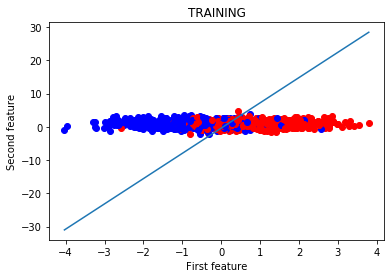

In [4]:
t.show_data("TRAINING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()

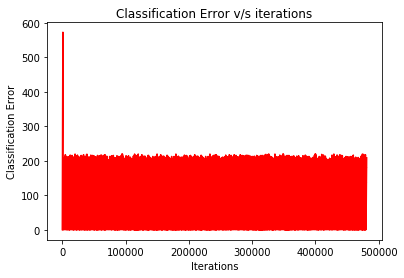

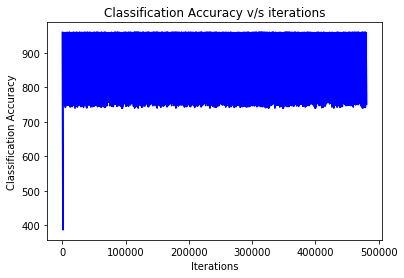

In [5]:
t.draw_error_count()


In [6]:
t.take_test_input()
t.test()

================================       TESTING        ==================================
Test Data size :  240
True positive : 103, False positive : 20
True negative : 95, False negative : 22
============================         TESTING FINISHED          =========================


=== Data points given to train : 960 ===


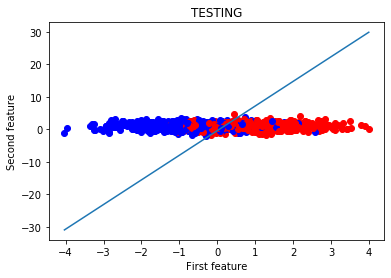

In [7]:
t.show_data("TESTING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()

In [8]:
# Data was not linearly seperable and hence perceptron fails